In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches

In [2]:
import numpy as np
from numpy import ma

import pandas as pd
from pandas import DataFrame, Series  
import pims
import trackpy as tp

import cv2

import scipy
from scipy import signal
from scipy import ndimage

from math import sqrt

import skimage
from skimage import morphology, util
from skimage import filters
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

In [3]:
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(30,20))
mpl.rc('image', cmap='gray')

In [4]:
path='E:/Hard Drive Quincke Rotation/2019-02-05/150V.mov'

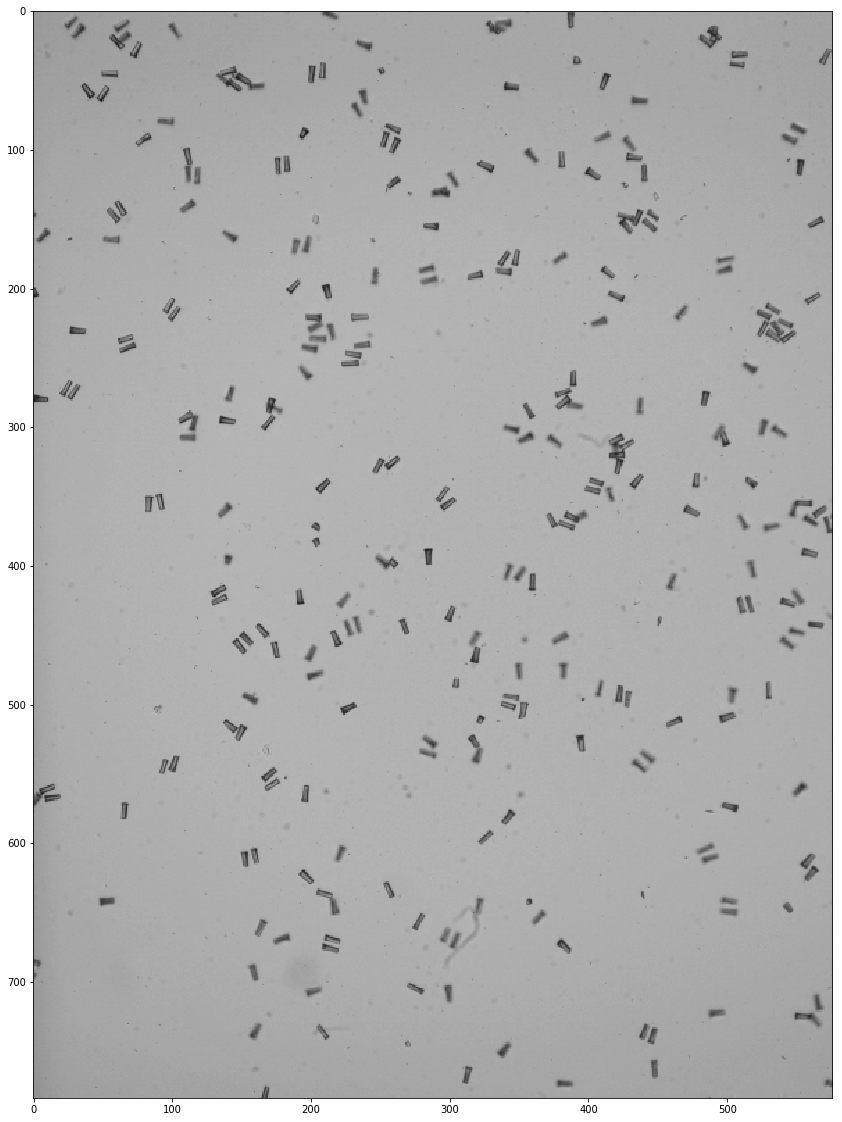

In [5]:
p = pims.Video(path)

plt.imshow(p[1])

In [6]:
length=len(p)-1
length

4300

In [13]:
leg=500

In [14]:
zoom=2
fps=500

In [15]:
gap=int(length/leg)
gap

8

In [16]:
#p1=[]
#p1=p[:][::gap]

In [17]:
iframe=0
gap=1
p1=[]
p1=p[iframe:(gap*leg)+iframe][::gap]

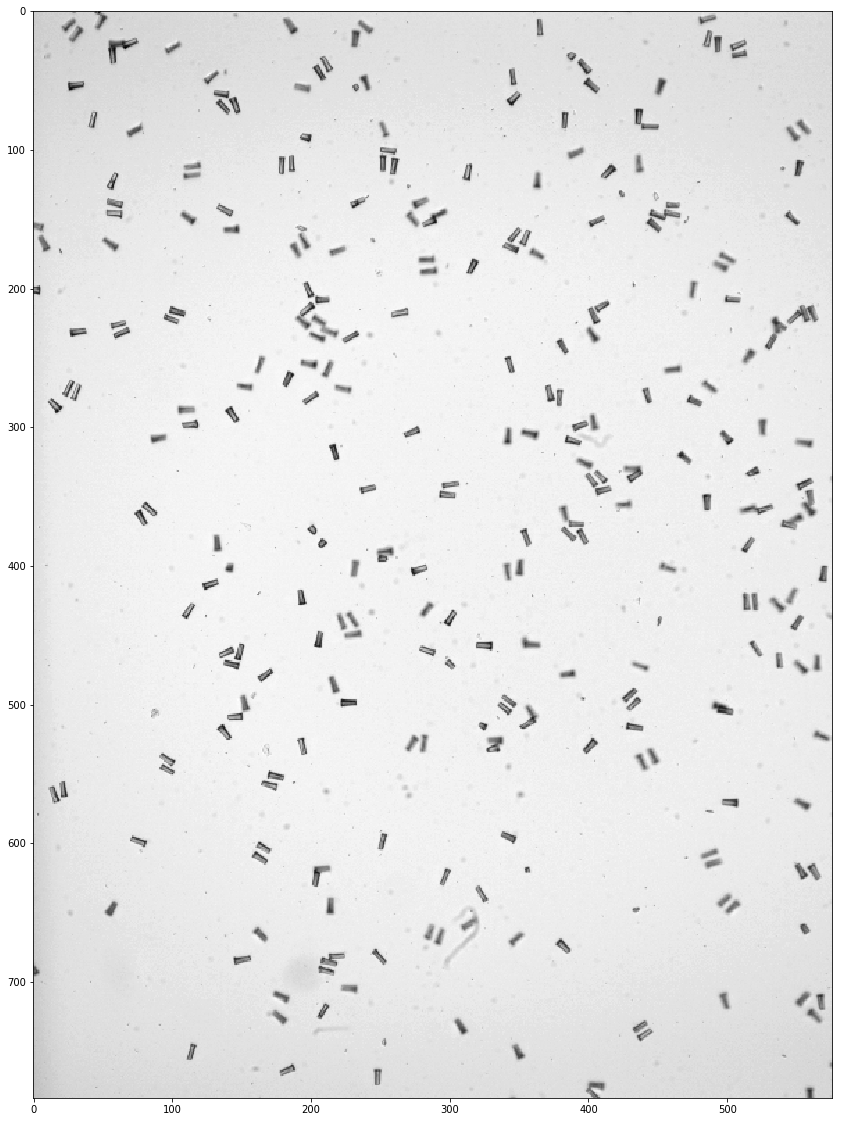

In [18]:
pp=[]

for i in range (leg):
    pp.append(p1[i][:,:,0])
    
plt.imshow(pp[9])

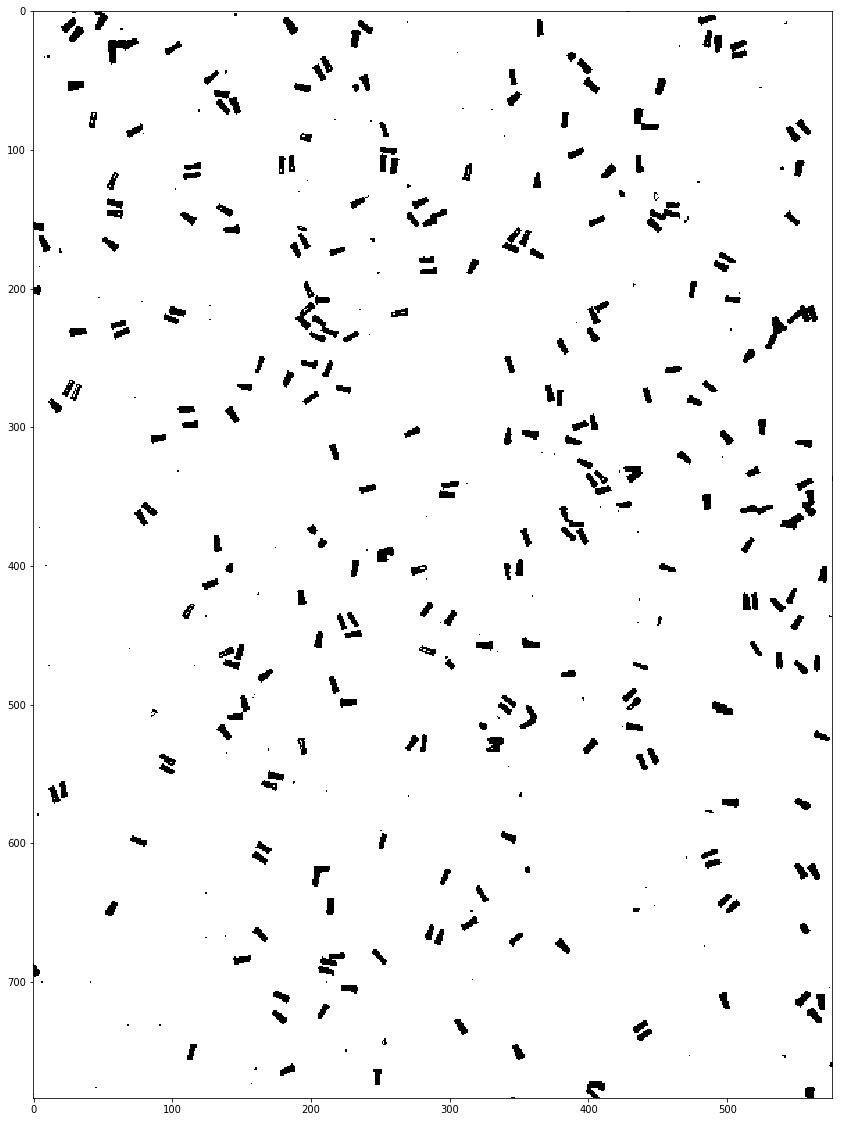

In [19]:
pb=[]
for i in range (0,leg):
    et,pbinary= cv2.threshold(pp[i],140,255,cv2.THRESH_BINARY)
    pb.append(pbinary)

plt.imshow(pb[9])

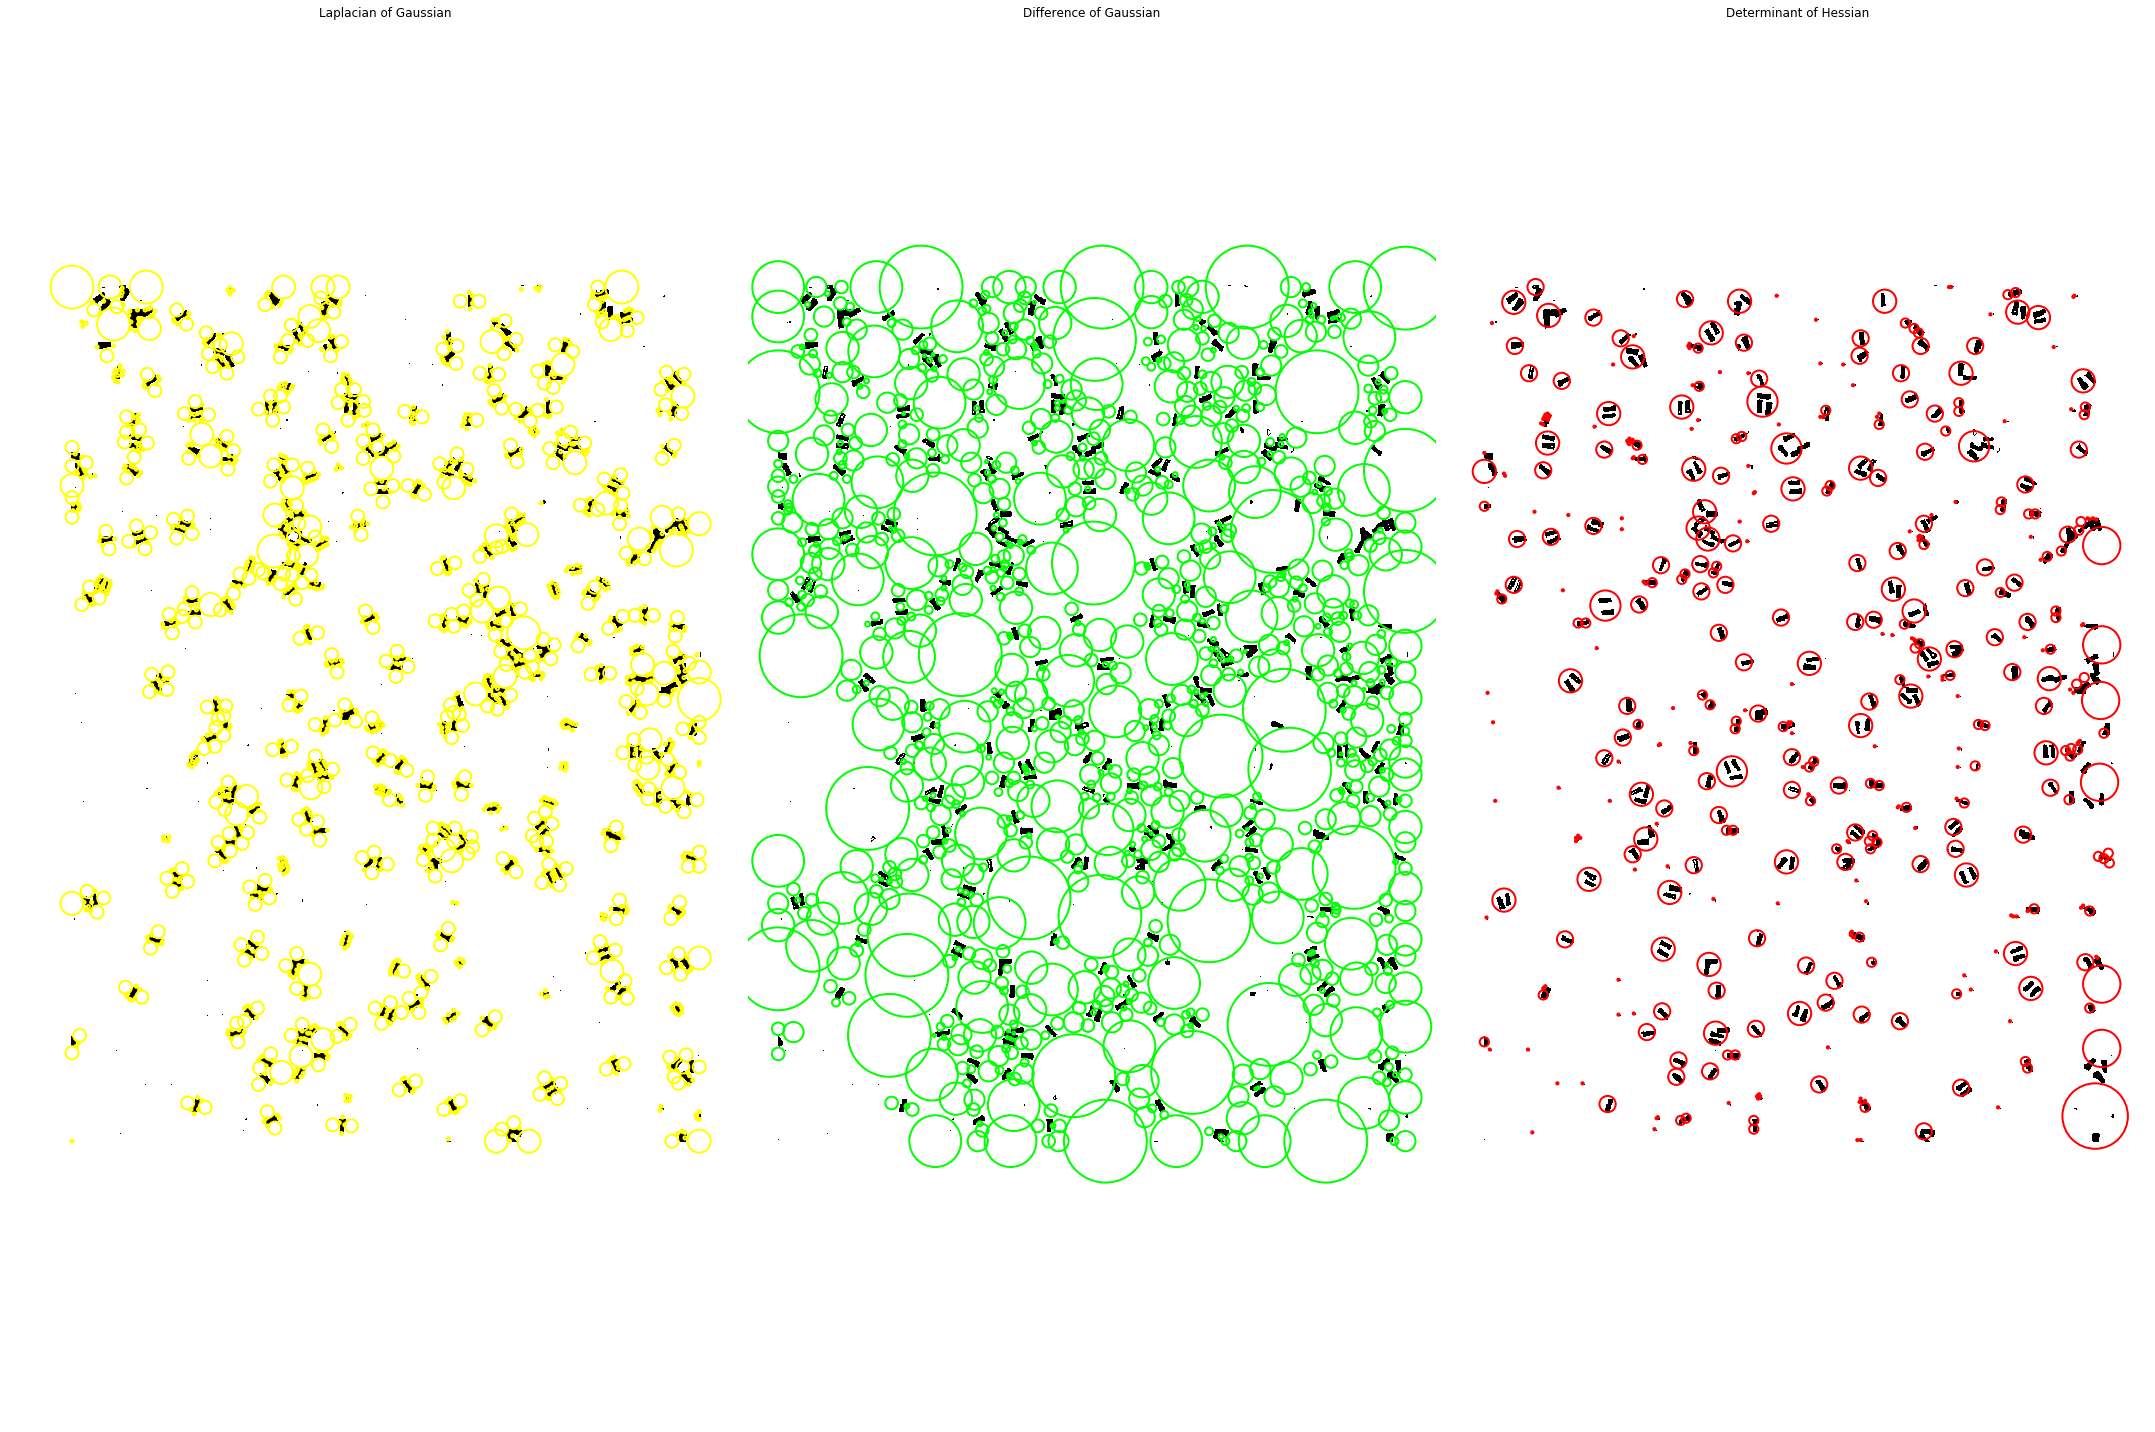

In [20]:
image = pb[9]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(30, 20), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

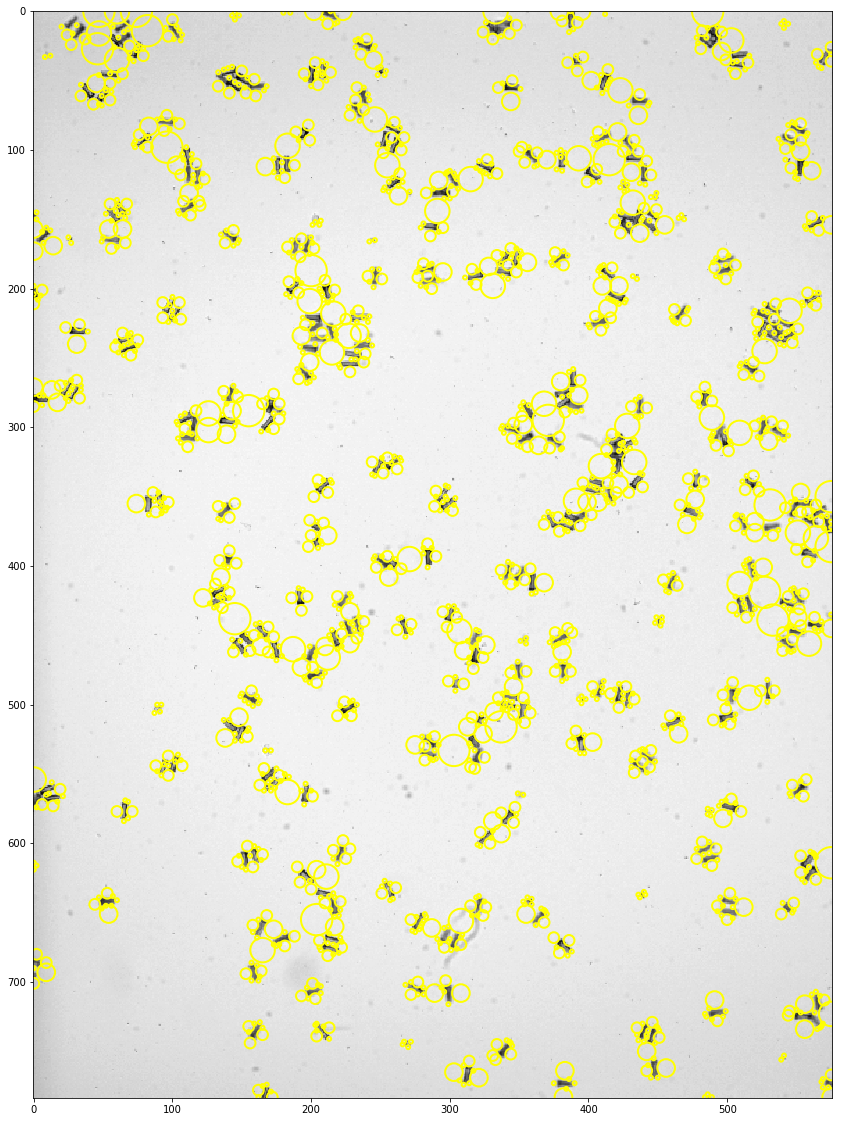

In [27]:
image = pb[1]
image_gray = rgb2gray(image)
y1=[]
x1=[]
r1=[]
b1 = blob_log(image_gray, max_sigma=8, num_sigma=5, threshold=.1)
b1[:, 2] = b1[:, 2] * sqrt(2)

fig, axes = plt.subplots(figsize=(20, 20))
axes.imshow(pp[1], interpolation='nearest')
y1 = b1[:,0]
x1 = b1[:,1]
r1 = b1[:,2]
for i in range(len(y1)-1):
    c = plt.Circle((x1[i], y1[i]), r1[i], color='yellow', linewidth=2, fill=False)
    axes.add_patch(c)

plt.show()


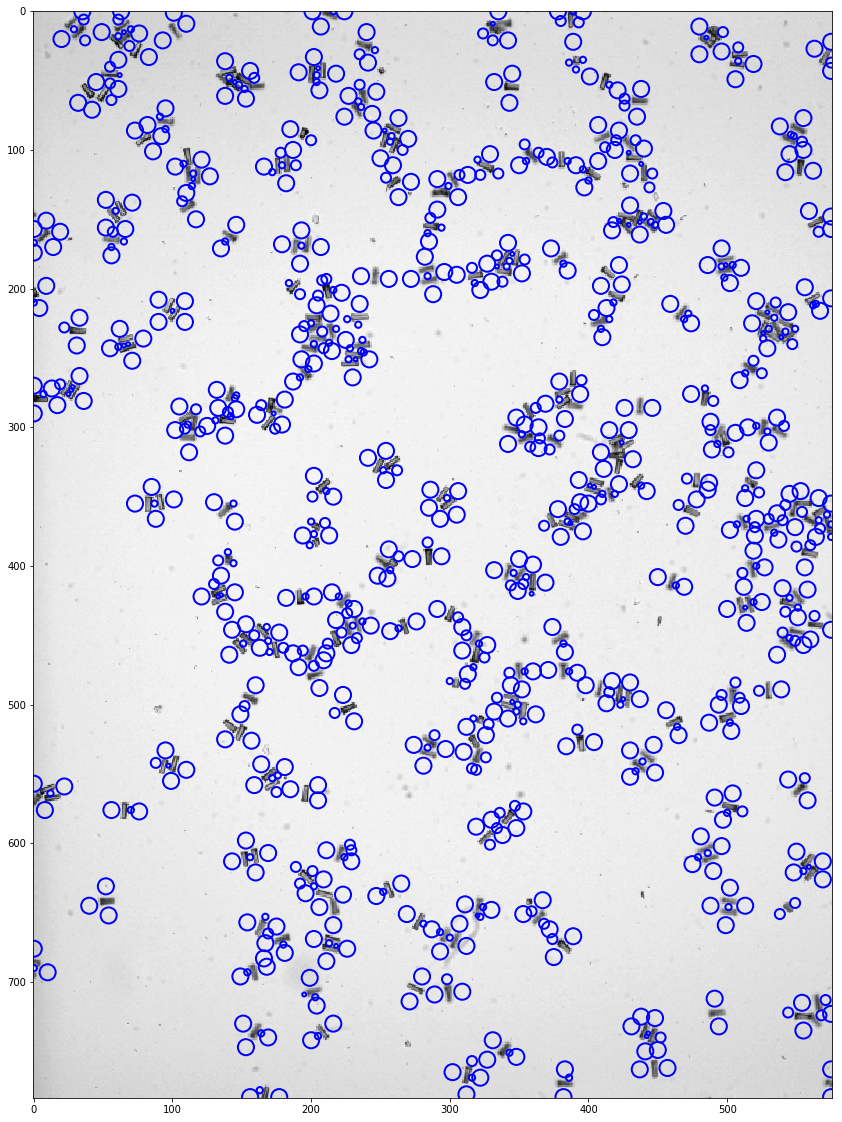

In [32]:
image = pb[1]
image_gray = rgb2gray(image)
y2=[]
x2=[]
r2=[]
b2 = blob_dog(image_gray, max_sigma=5, threshold=.1)
b2[:, 2] = b2[:, 2] * sqrt(2)

fig, axes = plt.subplots(figsize=(30, 20))
axes.imshow(pp[1], interpolation='nearest')
y2 = b2[:,0]
x2 = b2[:,1]
r2 = b2[:,2]
for i in range(len(y2)-1):
    c = plt.Circle((x2[i], y2[i]), r2[i], color='blue', linewidth=2, fill=False)
    axes.add_patch(c)

plt.show()

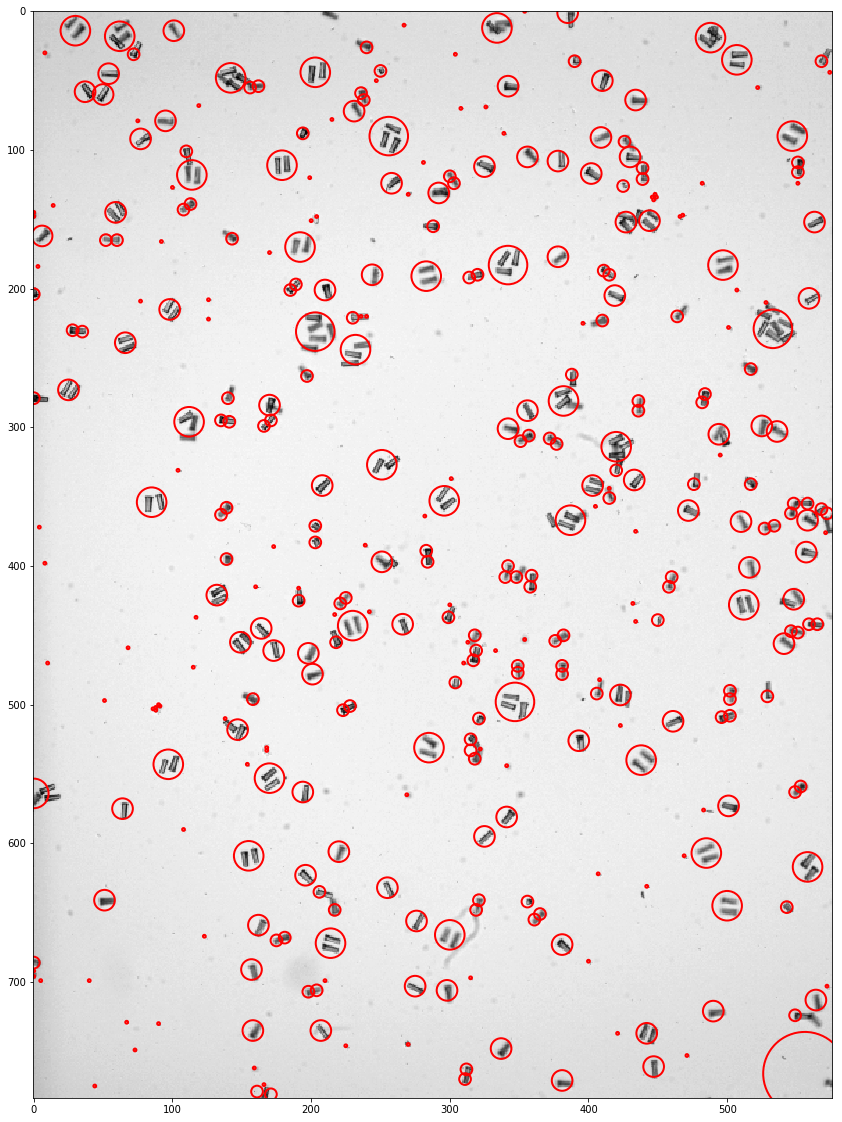

In [39]:
image = pb[1]
image_gray = rgb2gray(image)
y3=[]
x3=[]
r3=[]
b3 = blob_doh(image_gray, max_sigma=30, threshold=.02)

fig, axes = plt.subplots(figsize=(30, 20))
axes.imshow(pp[1], interpolation='nearest')
y3 = b3[:,0]
x3 = b3[:,1]
r3 = b3[:,2]
for i in range(len(y3)-1):
    c = plt.Circle((x3[i], y3[i]), r3[i], color='red', linewidth=2, fill=False)
    axes.add_patch(c)


plt.show()


In [ ]:
f = pd.DataFrame()
yy=[]
xx=[]
rr=[]
for num, img in enumerate(pb):
    image = img
    image_gray = rgb2gray(image)
    bb = blob_doh(image_gray, max_sigma=30, threshold=.02)
    
    yy = bb[:,0]
    xx = bb[:,1]
    rr = bb[:,2]
    
    for i in range(len(bb)-1):    
        f = f.append([{'y': yy[i],'x': xx[i],'frame': num,},])

In [90]:
f

frame      x      y
0       0  488.0  782.0
0       0  484.0  782.0
0       0  475.0  782.0
0       0  178.0  780.0
0       0  164.0  780.0
0       0  569.0  778.0
0       0  327.0  776.0
0       0   44.0  775.0
0       0  382.0  768.0
0       0  318.0  768.0
0       0  575.0  766.0
0       0  453.0  766.0
0       0  160.0  762.0
0       0  453.0  757.0
0       0  372.0  755.0
0       0  540.0  754.0
0       0  471.0  753.0
0       0  344.0  751.0
0       0   73.0  749.0
0       0  225.0  746.0
0       0  271.0  743.0
0       0  268.0  742.0
0       0    1.0  741.0
0       0  270.0  739.0
0       0  165.0  739.0
0       0  443.0  737.0
0       0  210.0  732.0
0       0  164.0  732.0
0       0   90.0  730.0
0       0   67.0  729.0
..    ...    ...    ...
0       9  393.0   37.0
0       9   57.0   35.0
0       9  386.0   33.0
0       9   10.0   33.0
0       9    7.0   33.0
0       9  304.0   30.0
0       9   61.0   30.0
0       9  506.0   28.0
0       9  101.0   28.0
0       9  464.0   25.0
0       9   67.0   24.0
0       9   56.0   24.0
0       9  488.0   22.0
0       9  234.0   17.0
0       9  186.0   14.0
0       9   62.0   13.0
0       9   27.0   13.0
0       9  364.0   12.0
0       9  541.0    9.0
0       9  268.0    8.0
0       9  480.0    7.0
0       9  181.0    7.0
0       9   37.0    6.0
0       9  487.0    5.0
0       9  145.0    3.0
0       9  481.0    0.0
0       9  428.0    0.0
0       9  426.0    0.0
0       9  187.0    0.0
0       9   47.0    0.0

[4638 rows x 3 columns]

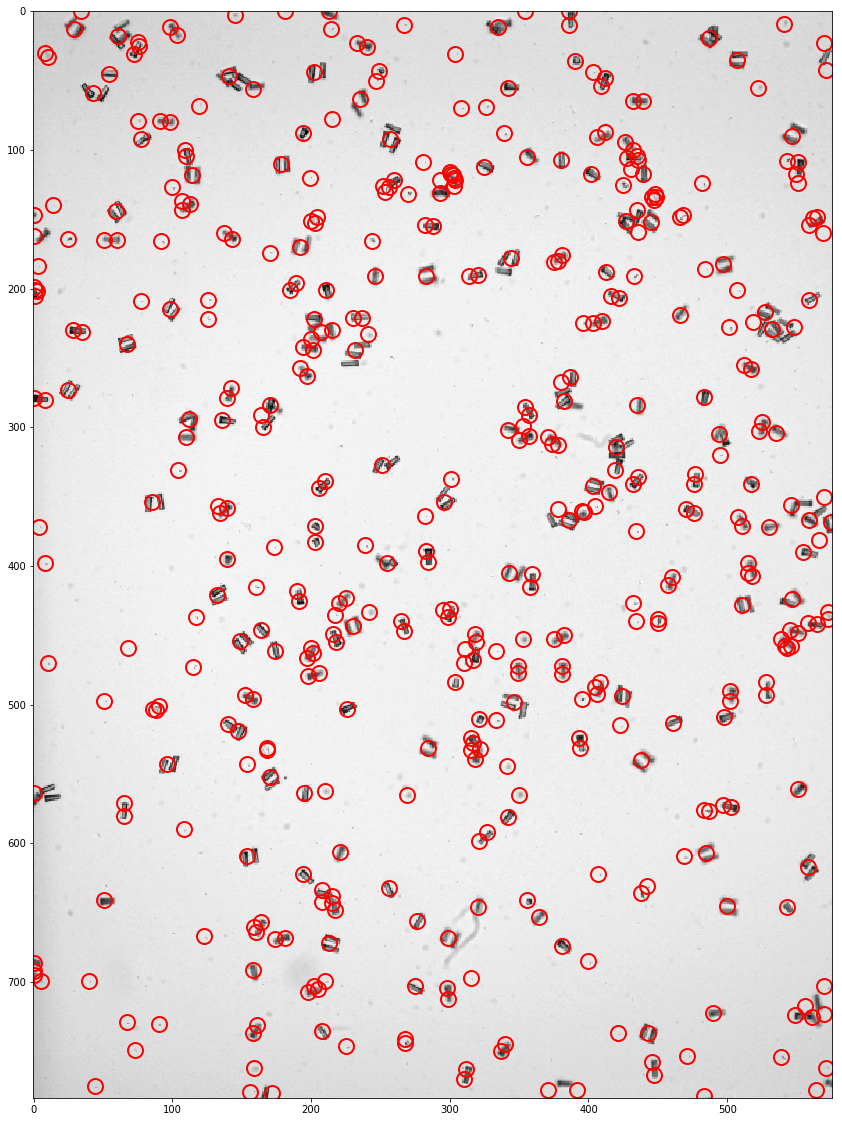

In [104]:
tp.annotate(f[f.frame==1], pp[1])

In [93]:
t = tp.link_df(f, 5, memory=1)

Frame 9: 451 trajectories present.


In [94]:
t1 = tp.filter_stubs(t, 5)

print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 2312
After: 209


In [51]:
#t1

In [52]:
#plt.figure()
#tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [53]:
#tt = t1[((t1['mass'] > 8000) & (t1['size'] < 8.25) &
#        (t1['ecc'] < 0.1))]

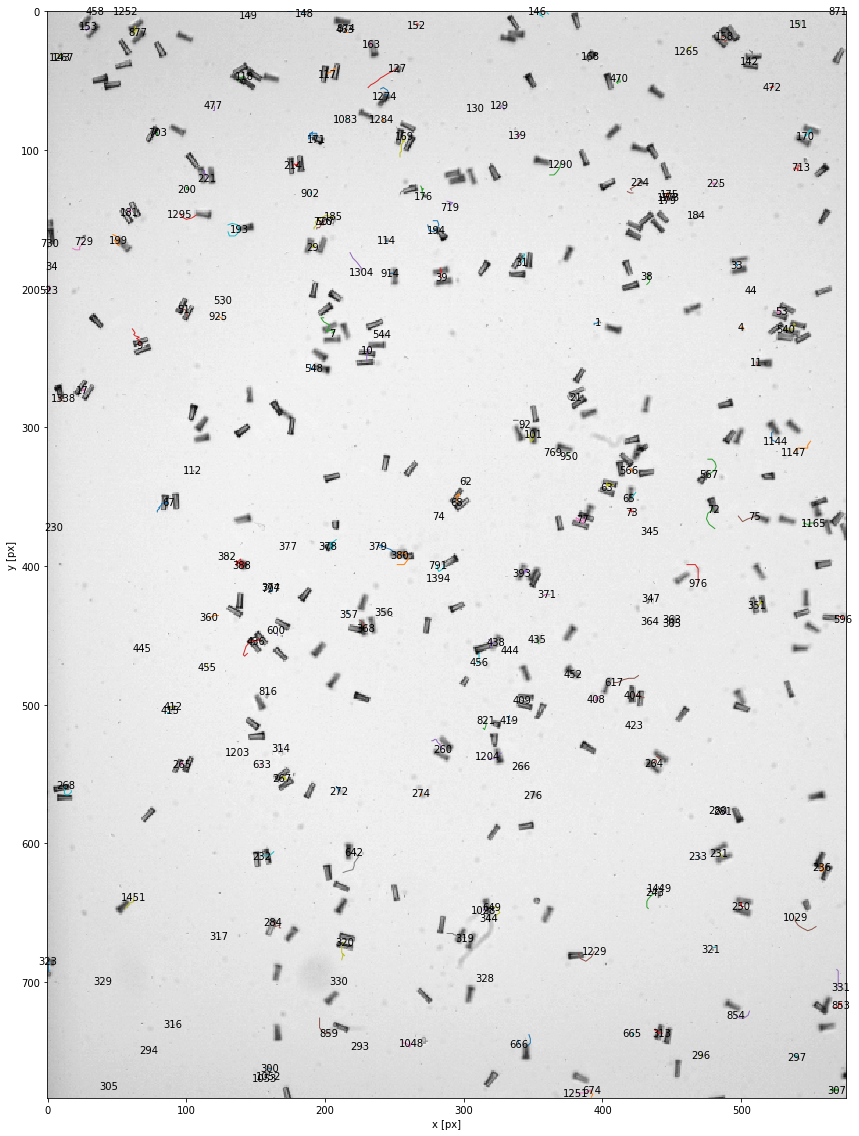

In [102]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.imshow(pp[0])
tp.plot_traj(t1, label=True)

In [103]:
plist=t1['particle'].values
plist=set(plist)
plist=list(plist)

plist

[1,
 4,
 1029,
 7,
 9,
 10,
 11,
 17,
 530,
 21,
 1048,
 1028,
 540,
 29,
 31,
 544,
 33,
 34,
 859,
 548,
 38,
 39,
 44,
 51,
 53,
 566,
 567,
 1083,
 1290,
 62,
 63,
 65,
 67,
 68,
 950,
 72,
 73,
 74,
 75,
 77,
 596,
 600,
 92,
 101,
 617,
 112,
 114,
 117,
 118,
 1144,
 633,
 1147,
 127,
 129,
 130,
 877,
 649,
 139,
 1165,
 142,
 143,
 1304,
 146,
 148,
 149,
 151,
 152,
 153,
 666,
 158,
 674,
 163,
 1284,
 1267,
 168,
 169,
 170,
 171,
 175,
 176,
 177,
 178,
 179,
 1204,
 181,
 184,
 185,
 703,
 193,
 194,
 199,
 200,
 713,
 1229,
 719,
 214,
 729,
 730,
 1274,
 221,
 224,
 225,
 1251,
 1252,
 230,
 231,
 232,
 233,
 236,
 1265,
 243,
 250,
 769,
 260,
 726,
 264,
 265,
 266,
 267,
 268,
 642,
 1295,
 272,
 274,
 276,
 791,
 280,
 281,
 284,
 797,
 293,
 294,
 296,
 297,
 300,
 816,
 305,
 307,
 821,
 313,
 314,
 316,
 317,
 319,
 320,
 321,
 323,
 328,
 329,
 330,
 331,
 853,
 854,
 344,
 345,
 347,
 1338,
 351,
 523,
 356,
 357,
 871,
 360,
 874,
 363,
 364,
 365,
 1052,
 368

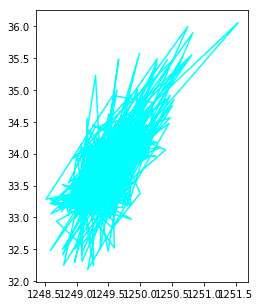

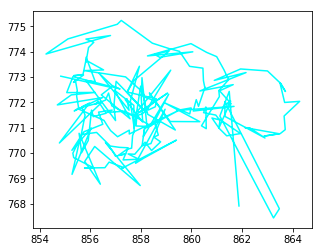

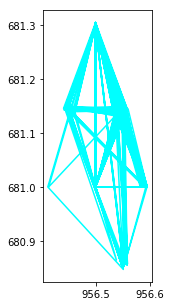

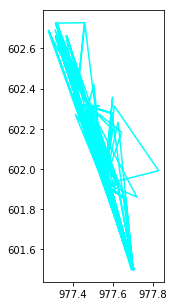

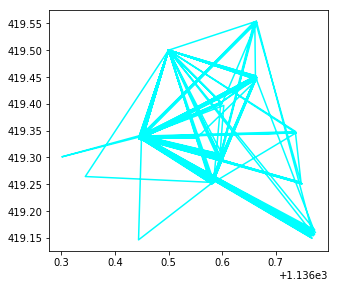

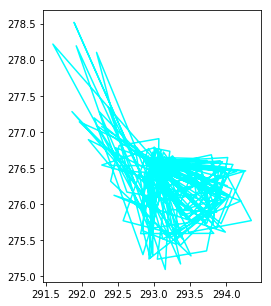

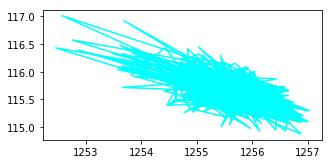

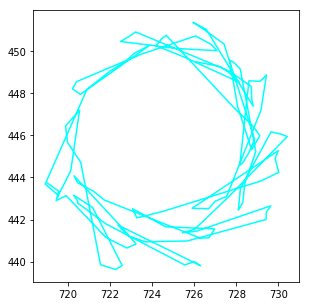

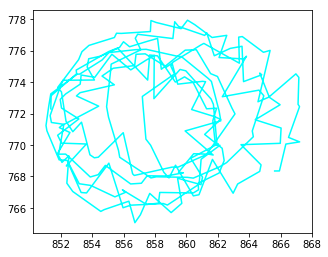

In [758]:
for i in plist[:]:

    fig, ax = plt.subplots(figsize=(5, 5))
    
    ax.plot(t1[t1['particle']==i]['x'].values,t1[t1['particle']==i]['y'].values, color=(0,1,1), alpha=1)  
    ax.set_aspect(1.0)

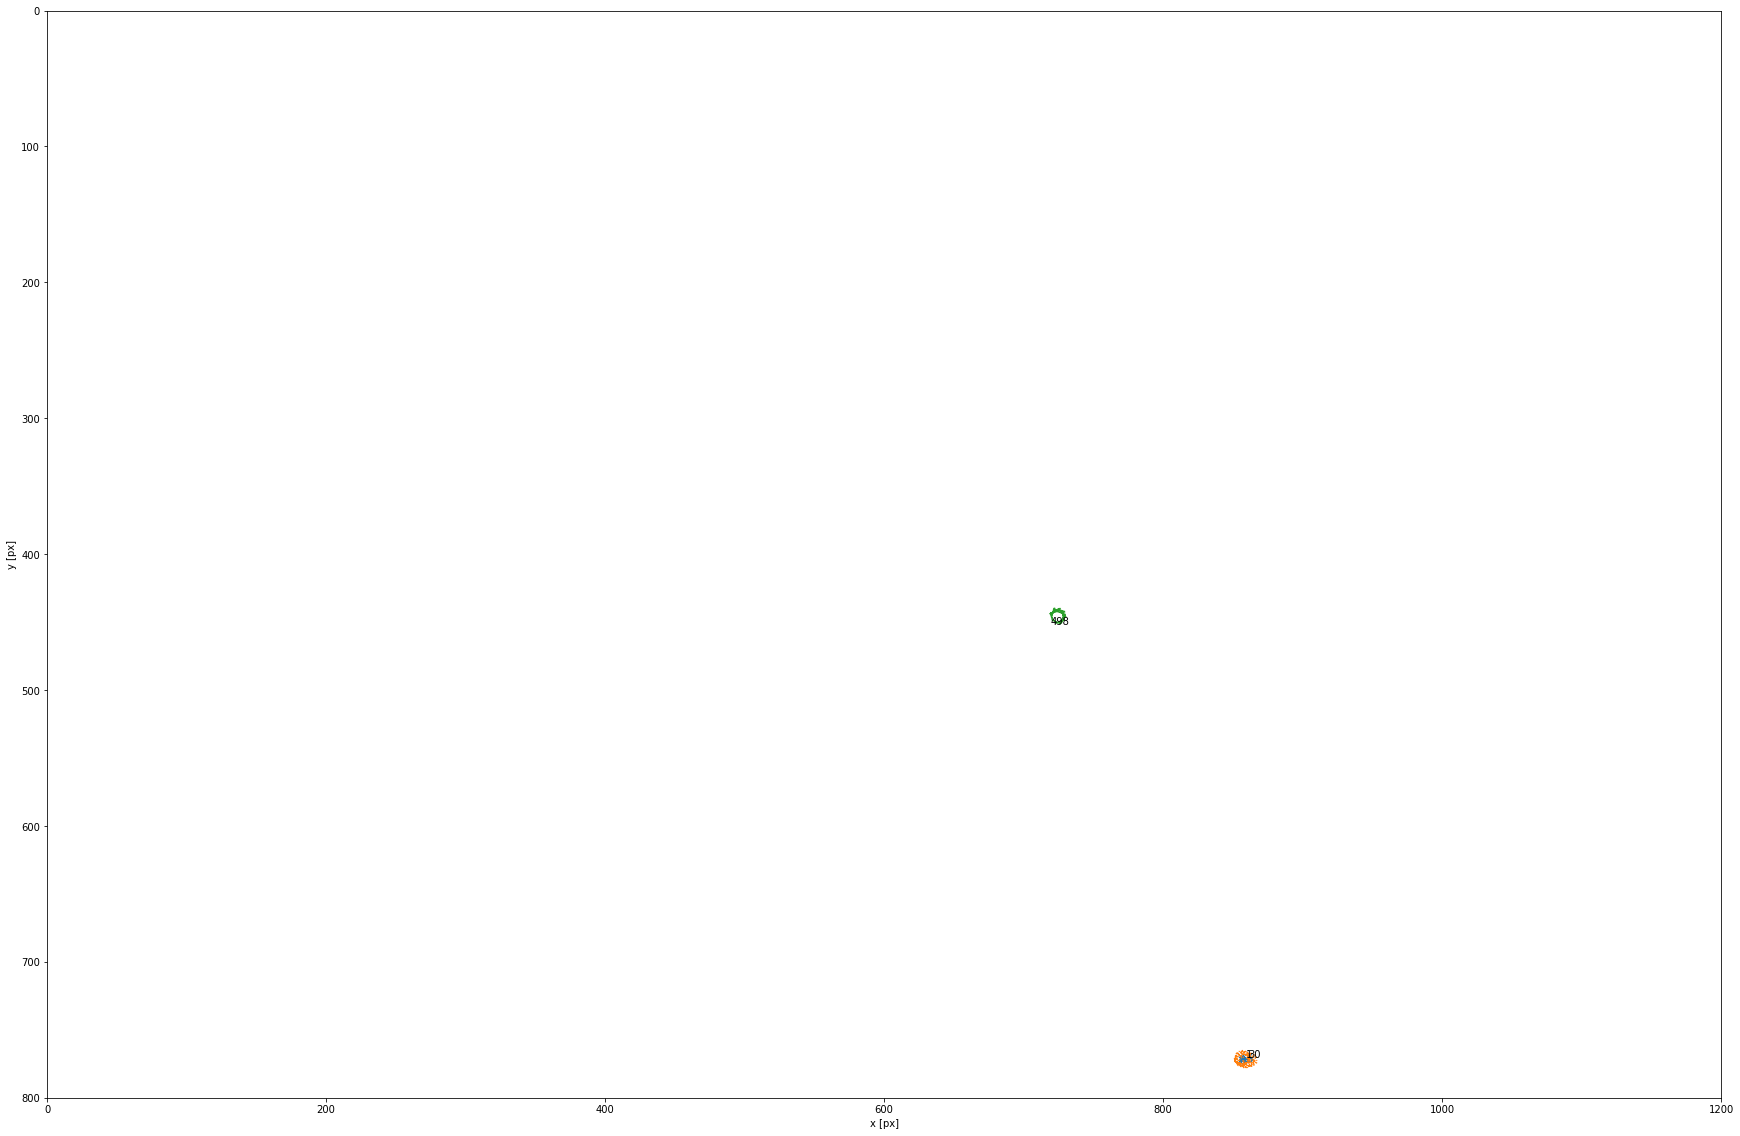

In [759]:
circle=[1,30,498]

t31=[]

for i in circle[:]:
    t31.append(t1[(t1['particle']==i)])

t3 = pd.concat(t31)

plt.figure()
plt.ylim(800,0)
plt.xlim(0,1200)
tp.plot_traj(t3,label=True);


In [760]:
pcirclelist=t3['particle'].values
pcirclelist=set(pcirclelist)
pcirclelist=list(pcirclelist)

pcirclelist

[1, 498, 30]

In [761]:
#dik={}
#for i in plist[:]:
#    dik["px{0}".format(i)]=t1[t1['particle']==i]['x'].values
#    dik["py{0}".format(i)]=t1[t1['particle']==i]['y'].values
#    dik["pf{0}".format(i)]=t1[t1['particle']==i]['frame'].values
#    dik["velo{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
#    dik["vex{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
#    dik["vey{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
#    for j in range(len(dik["pf{0}".format(i)])-1):
#        dik["velo{0}".format(i)][j]=np.sqrt(( dik["py{0}".format(i)][j+1]- dik["py{0}".format(i)][j])**2 \
#                                           +( dik["px{0}".format(i)][j+1]- dik["px{0}".format(i)][j])**2)/(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps
#        dik["vex{0}".format(i)][j]=(dik["px{0}".format(i)][j+1]- dik["px{0}".format(i)][j])/(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps
#        dik["vey{0}".format(i)][j]=(dik["py{0}".format(i)][j+1]- dik["py{0}".format(i)][j])/(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps


In [56]:
dik={}
for i in plist[:]:
    dik["pfreal{0}".format(i)]=t1[t1['particle']==i]['frame'].values
    dik["px{0}".format(i)]=t1[t1['particle']==i]['x'][::1].values
    dik["py{0}".format(i)]=t1[t1['particle']==i]['y'][::1].values
    dik["pf{0}".format(i)]=t1[t1['particle']==i]['frame'][::1].values
    dik["smpx{0}".format(i)]=signal.savgol_filter( dik["px{0}".format(i)], 5, 2)
    dik["smpy{0}".format(i)]=signal.savgol_filter( dik["py{0}".format(i)], 5, 2)
    dik["velo{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
    dik["vex{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
    dik["vey{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-1)
    dik["d2s{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["d2x{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["d2y{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["cur{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    dik["rad{0}".format(i)]=np.zeros(len(dik["pf{0}".format(i)])-2)
    for j in range(len(dik["pf{0}".format(i)])-1):
        dik["velo{0}".format(i)][j]=np.sqrt(( dik["smpy{0}".format(i)][j+1]- dik["smpy{0}".format(i)][j])**2 \
                                           +( dik["smpx{0}".format(i)][j+1]- dik["smpx{0}".format(i)][j])**2)\
                                           /(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps/gap
        dik["vex{0}".format(i)][j]=(dik["smpx{0}".format(i)][j+1]- dik["smpx{0}".format(i)][j])\
                                          /(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps/gap
        dik["vey{0}".format(i)][j]=(dik["smpy{0}".format(i)][j+1]- dik["smpy{0}".format(i)][j])\
                                          /(dik["pf{0}".format(i)][j+1]-dik["pf{0}".format(i)][j])*zoom *fps/gap
    
    for k in range(len(dik["pf{0}".format(i)])-2):
        dik["d2s{0}".format(i)][k]=(dik["velo{0}".format(i)][k+1]- dik["velo{0}".format(i)][k])\
                                           /(dik["pf{0}".format(i)][k+1]-dik["pf{0}".format(i)][k])*fps/gap
        dik["d2x{0}".format(i)][k]=(dik["vex{0}".format(i)][k+1]- dik["vex{0}".format(i)][k])\
                                            /(dik["pf{0}".format(i)][k+1]-dik["pf{0}".format(i)][k])*fps/gap
        dik["d2y{0}".format(i)][k]=(dik["vey{0}".format(i)][k+1]- dik["vey{0}".format(i)][k])\
                                            /(dik["pf{0}".format(i)][k+1]-dik["pf{0}".format(i)][k])*fps/gap
    
        dik["cur{0}".format(i)][k]=np.abs(dik["d2x{0}".format(i)][k] * dik["vey{0}".format(i)][k] \
                                   - dik["vex{0}".format(i)][k]* dik["d2y{0}".format(i)][k])\
                        / (dik["vex{0}".format(i)][k] * dik["vex{0}".format(i)][k] \
                           + dik["vey{0}".format(i)][k] * dik["vey{0}".format(i)][k])**1.5
    dik["rad{0}".format(i)]=1/dik["cur{0}".format(i)]

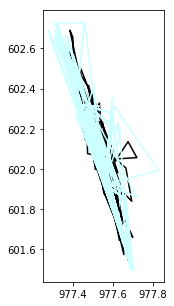

In [763]:
trial=3

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(   dik["smpx{0}".format(trial)], dik["smpy{0}".format(trial)], color=(0,0,0), alpha=1)  
ax.plot(  dik["px{0}".format(trial)],dik["py{0}".format(trial)], color=(0.8,1,1), alpha=1)  
ax.set_aspect(1.0)

In [764]:
#veloarray = np.array([ [dik["vex{0}".format(trial)][i], dik["vey{0}".format(trial)][i]] for i in range(dik["vex{0}".format(trial)].size)])

#veloarray

In [765]:
#tangent = np.array([1/dik["velo{0}".format(trial)]] * 2).transpose() * veloarray

#tangent

In [766]:
#tangent_x = tangent[:, 0]
#tangent_y = tangent[:, 1]

#deriv_tangent_x = np.gradient(tangent_x)
#deriv_tangent_y = np.gradient(tangent_y)

#dT_dt = np.array([ [deriv_tangent_x[i], deriv_tangent_y[i]] for i in range(deriv_tangent_x.size)])

#length_dT_dt = np.sqrt(deriv_tangent_x * deriv_tangent_x + deriv_tangent_y * deriv_tangent_y)

#normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt

#normal

In [767]:
#d2s=np.zeros(len(dik["pf{0}".format(trial)])-1)
#d2x=np.zeros(len(dik["pf{0}".format(trial)])-1)
#d2y=np.zeros(len(dik["pf{0}".format(trial)])-1)

#for j in range(len(dik["pf{0}".format(trial)])-2):
#    d2s[j] = (dik["velo{0}".format(trial)][j+1]- dik["velo{0}".format(trial)][j])/(dik["pf{0}".format(trial)][j+1]-dik["pf{0}".format(trial)][j])*zoom *fps
#    d2x[j] = (dik["vex{0}".format(trial)][j+1]- dik["vex{0}".format(trial)][j])/(dik["pf{0}".format(trial)][j+1]-dik["pf{0}".format(trial)][j])*zoom *fps
#    d2y[j] = (dik["vey{0}".format(trial)][j+1]- dik["vey{0}".format(trial)][j])/(dik["pf{0}".format(trial)][j+1]-dik["pf{0}".format(trial)][j])*zoom *fps


#curvature = np.abs(d2x * dik["vey{0}".format(trial)] - dik["vex{0}".format(trial)] * d2y) / (dik["vex{0}".format(trial)] * dik["vex{0}".format(trial)] + dik["vey{0}".format(trial)] * dik["vey{0}".format(trial)])**1.5
#t_component = np.array([d2s] * 2).transpose()
#n_component = np.array([curvature * dik["velo{0}".format(trial)] * dik["velo{0}".format(trial)]] * 2).transpose()
#radius=1/curvature

(5, 185)

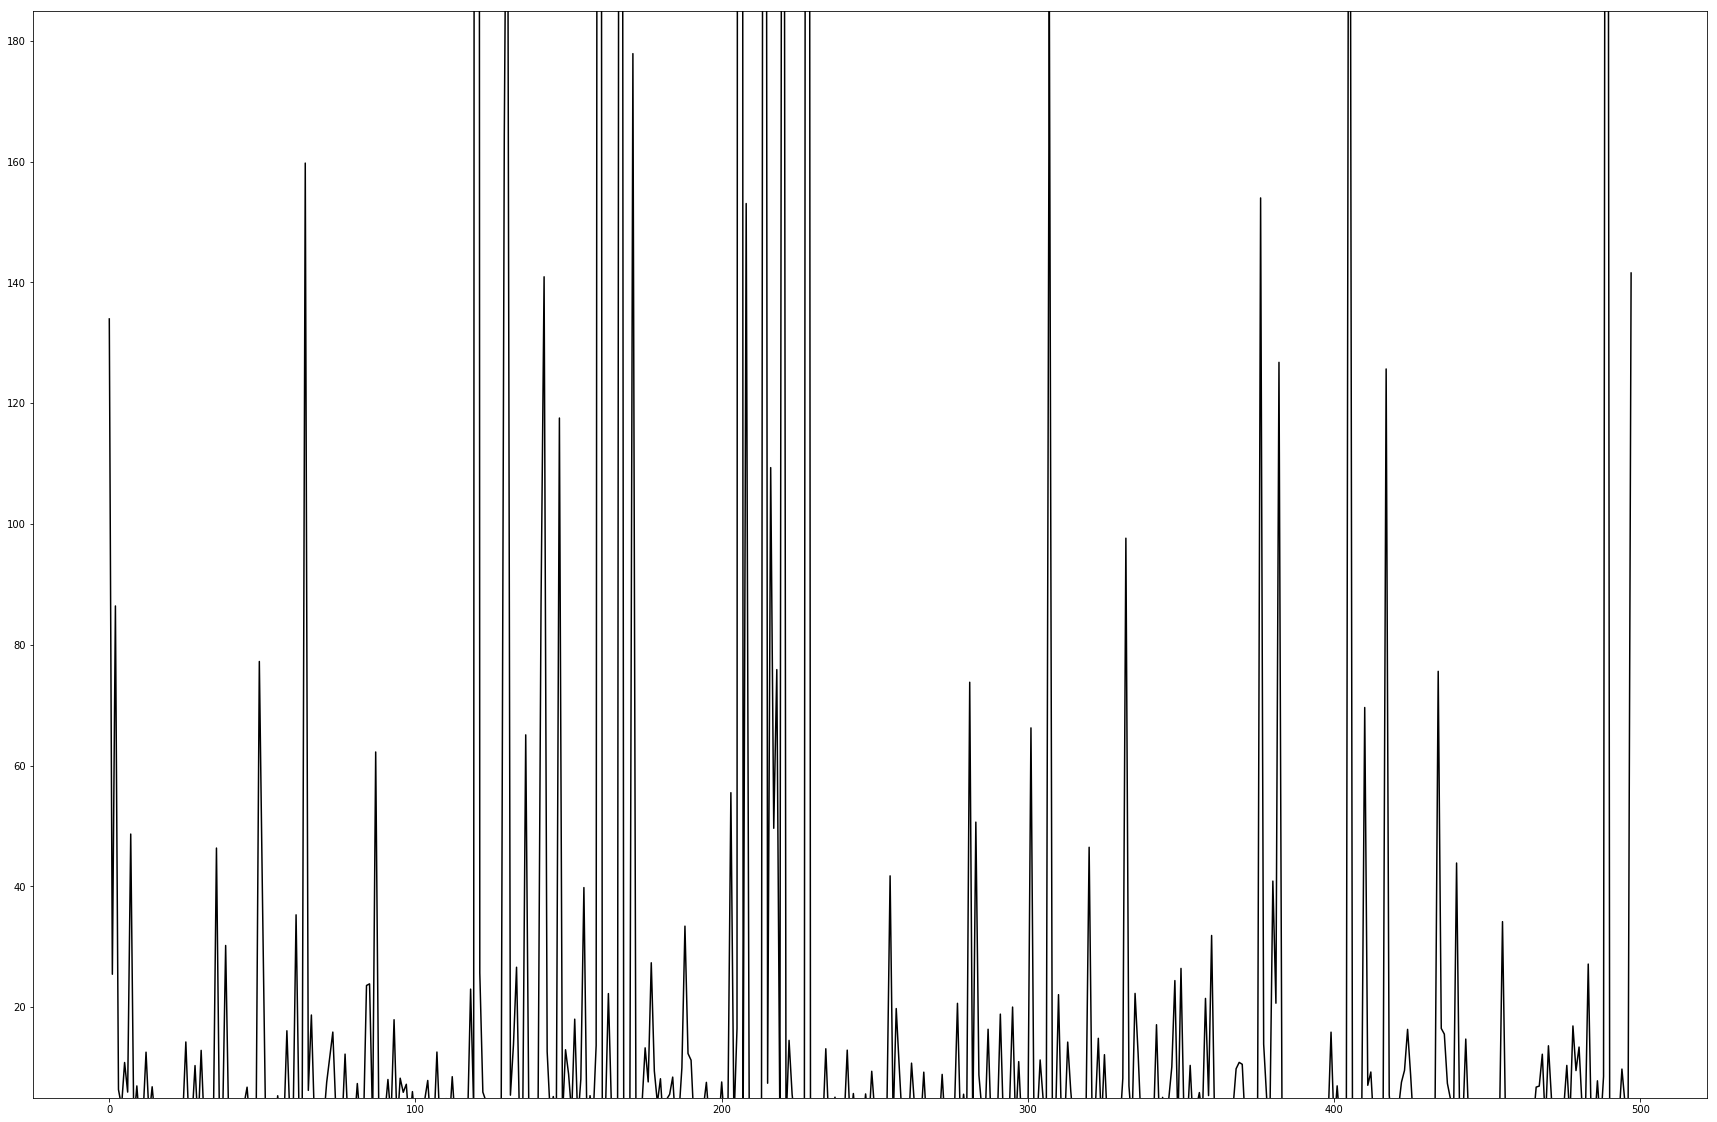

In [768]:
fig, ax = plt.subplots()
ax.plot(  dik["pf{0}".format(trial)][:len(dik["pf{0}".format(trial)])-2],dik["rad{0}".format(trial)], color=(0,0,0), alpha=1)  

plt.ylim(5,185)
#lt.xlim(0,150)

In [769]:
print ("radius",float(sum(dik["rad{0}".format(trial)]))/max(len(dik["rad{0}".format(trial)]),1))

radius 24.5549756768


IndexError: list index out of range

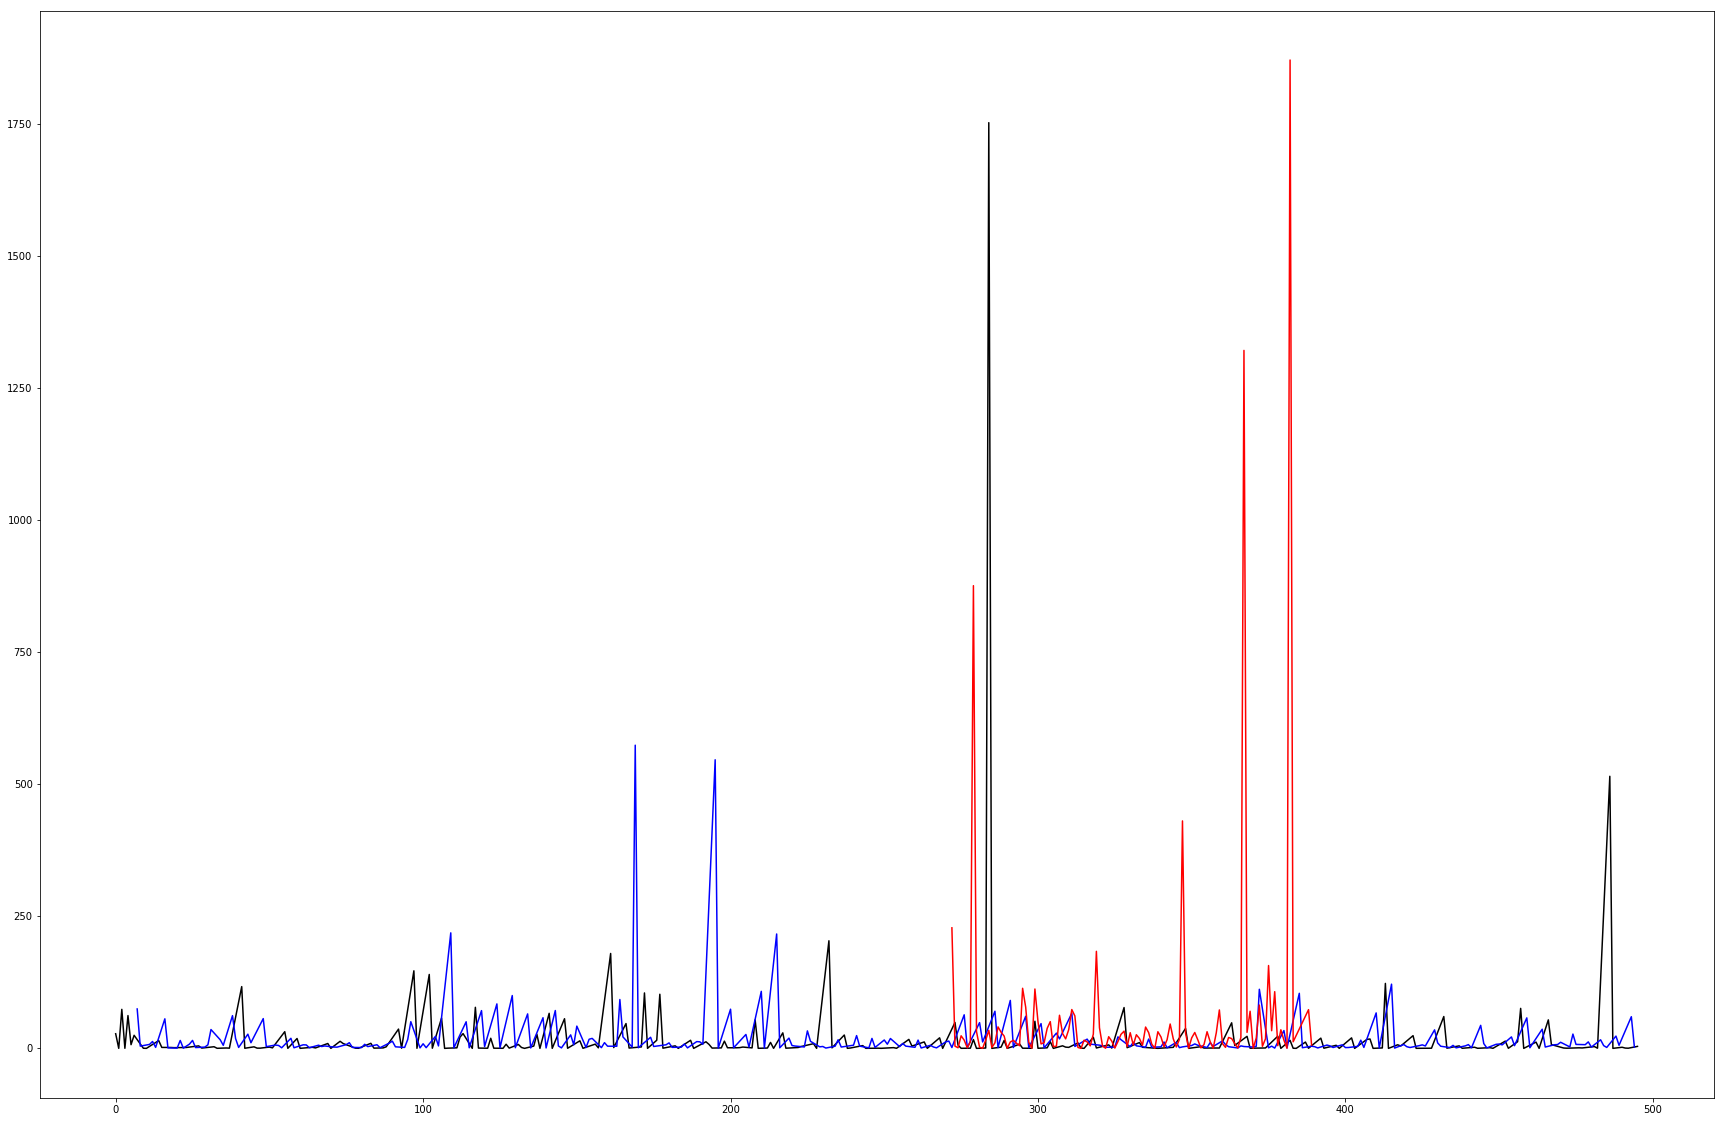

In [770]:
fig, ax = plt.subplots()
ax.plot(  dik["pf{0}".format(circle[0])][:len(dik["pf{0}".format(circle[0])])-2],dik["rad{0}".format(circle[0])], color=(0,0,0), alpha=1)  
ax.plot(  dik["pf{0}".format(circle[1])][:len(dik["pf{0}".format(circle[1])])-2],dik["rad{0}".format(circle[1])], 'b', alpha=1)  
ax.plot(  dik["pf{0}".format(circle[2])][:len(dik["pf{0}".format(circle[2])])-2],dik["rad{0}".format(circle[2])], 'r', alpha=1)  
ax.plot(  dik["pf{0}".format(circle[3])][:len(dik["pf{0}".format(circle[3])])-2],dik["rad{0}".format(circle[3])], 'y', alpha=1)  


IndexError: list index out of range

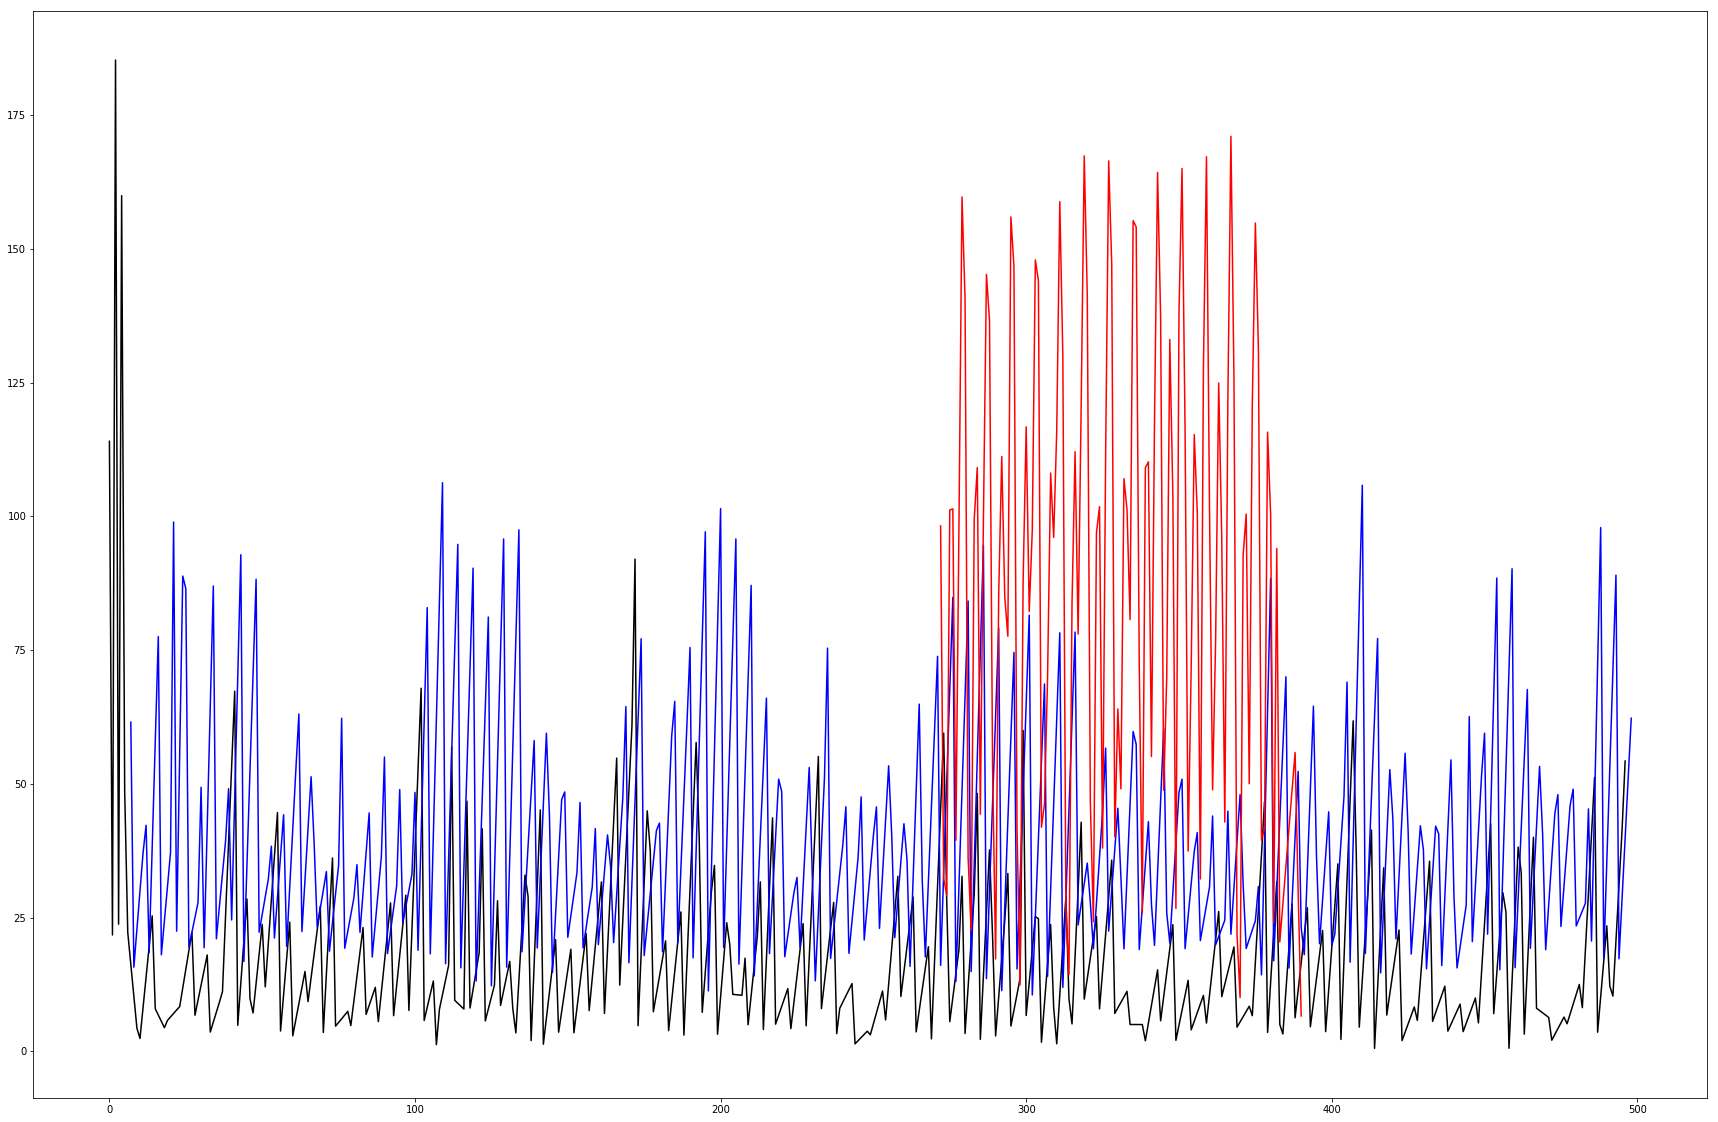

In [771]:
fig, ax = plt.subplots()
ax.plot(  dik["pf{0}".format(circle[0])][:len(dik["pf{0}".format(circle[0])])-1],dik["velo{0}".format(circle[0])], color=(0,0,0), alpha=1)  
ax.plot(  dik["pf{0}".format(circle[1])][:len(dik["pf{0}".format(circle[1])])-1],dik["velo{0}".format(circle[1])], 'b', alpha=1)  
ax.plot(  dik["pf{0}".format(circle[2])][:len(dik["pf{0}".format(circle[2])])-1],dik["velo{0}".format(circle[2])], 'r', alpha=1)  
ax.plot(  dik["pf{0}".format(circle[3])][:len(dik["pf{0}".format(circle[3])])-1],dik["velo{0}".format(circle[3])], 'y', alpha=1)  

#plt.ylim(0,2000)
#plt.xlim(0,150)

In [772]:
#maxp=max(plist)
#fig, ax = plt.subplots()
#for i in plist[:]:
#    ax.plot(  dik["pf{0}".format(i)][:len(dik["pf{0}".format(i)])-1],dik["velo{0}".format(i)], color=(1-i/maxp,i/maxp,0.5+0.5*i/maxp), alpha=1)  

#plt.ylim(0,5000)
#plt.xlim(0,leg)


In [773]:
for i in pcirclelist[:]:
    print ("particle",i,"(",float(sum(dik["px{0}".format(i)]))/max(len(dik["px{0}".format(i)]),1),",",float(sum(dik["py{0}".format(i)]))/max(len(dik["py{0}".format(i)]),1),")")
    print ("radius",float(sum(dik["rad{0}".format(i)]))/max(len(dik["rad{0}".format(i)]),1))
    print ("velocity",float(sum(dik["velo{0}".format(i)]))/max(len(dik["velo{0}".format(i)]),1))

particle 1 ( 858.274586746 , 771.711237829 )
radius 22.7165058433
velocity 19.7421384406
particle 498 ( 725.088602958 , 445.224124642 )
radius 65.8517620714
velocity 89.7029201504
particle 30 ( 858.227372115 , 771.943286267 )
radius 20.5277724052
velocity 40.7190748014


In [57]:
maxf=[]
for i in range(leg):
    maxf.append(len(t1[t1['frame']==i]))
    
#mf=max(maxf)

mf=11

In [58]:
len(t1[t1['frame']==mf])

153

In [59]:
qupx=[]
qupy=[]
quvx=[]
quvy=[]
for i in plist[:]:
    for j in range(len(dik["pf{0}".format(i)])-1):
        if  dik["pf{0}".format(i)][j]==mf:
            qupx.append(dik["px{0}".format(i)][j])
            qupy.append(dik["py{0}".format(i)][j])
            quvx.append(dik["vex{0}".format(i)][j])
            quvy.append(dik["vey{0}".format(i)][j])
            break

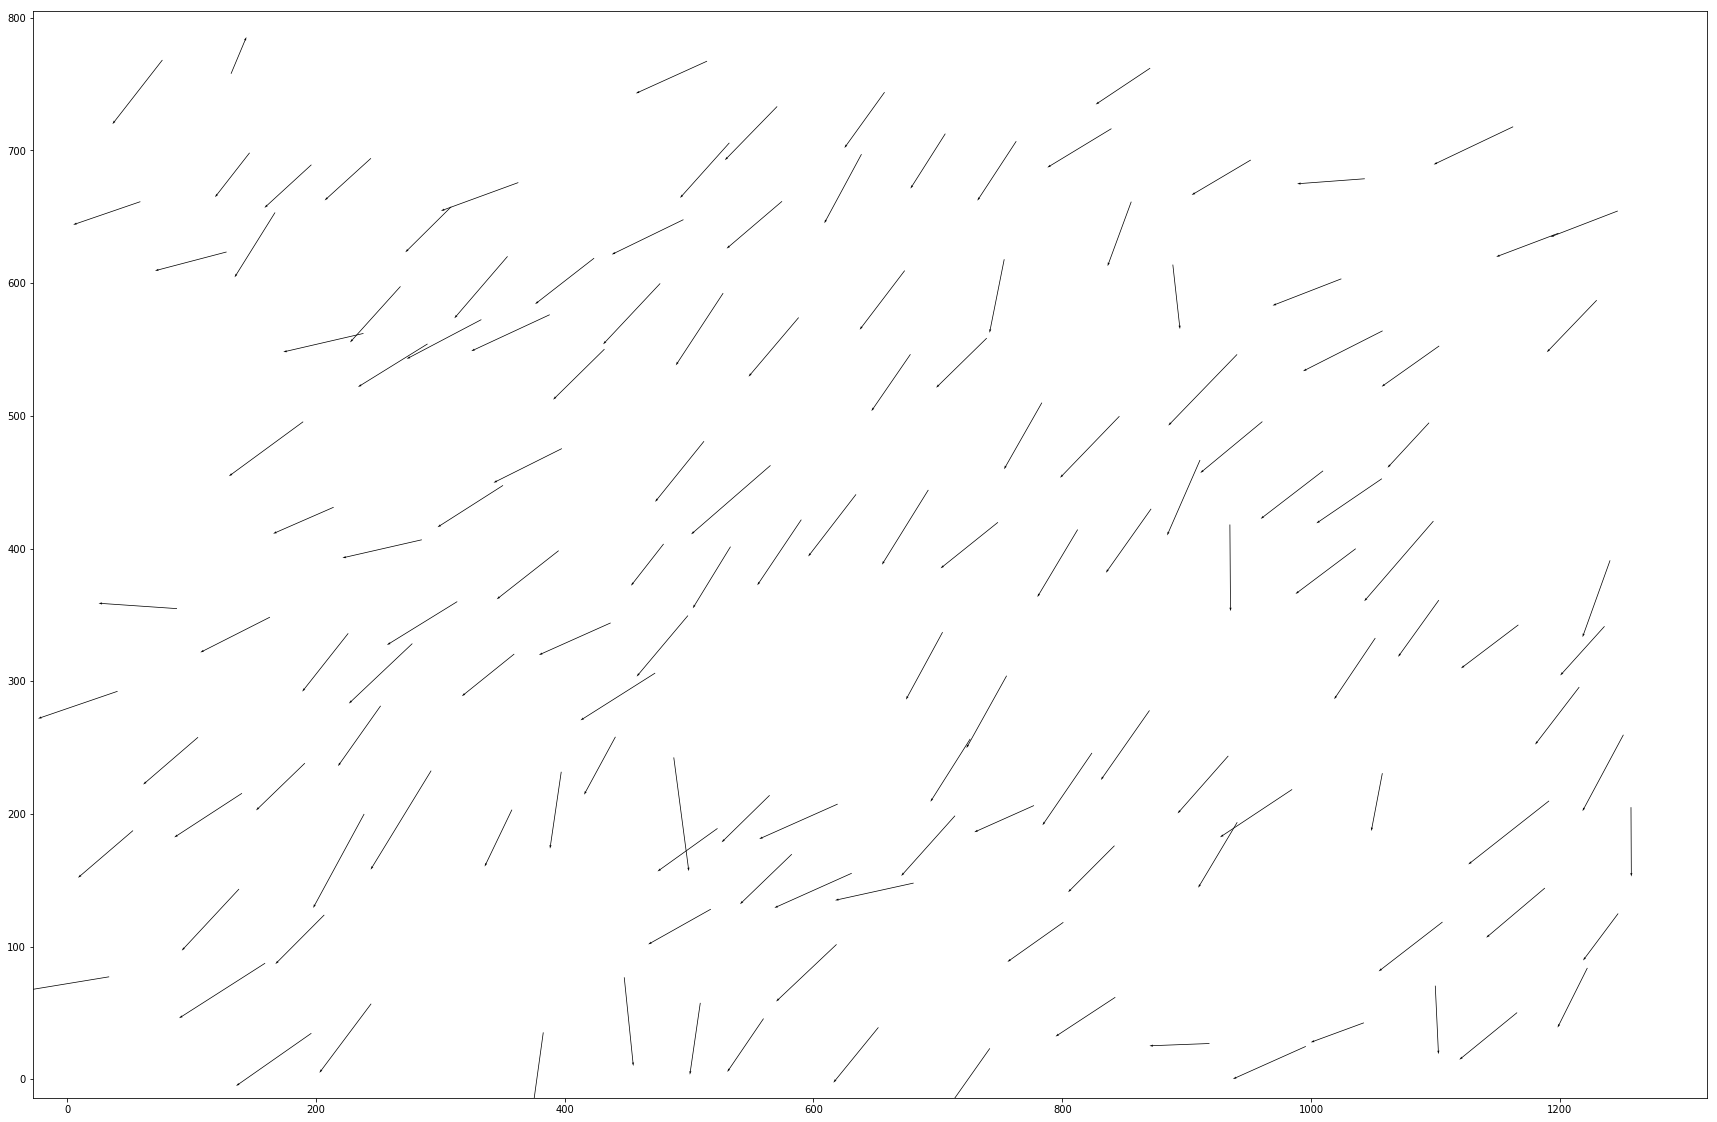

In [60]:
plt.figure()
qu=plt.quiver(qupx,qupy,quvx,quvy,units='inches',width=0.01,color=(0,0,0))


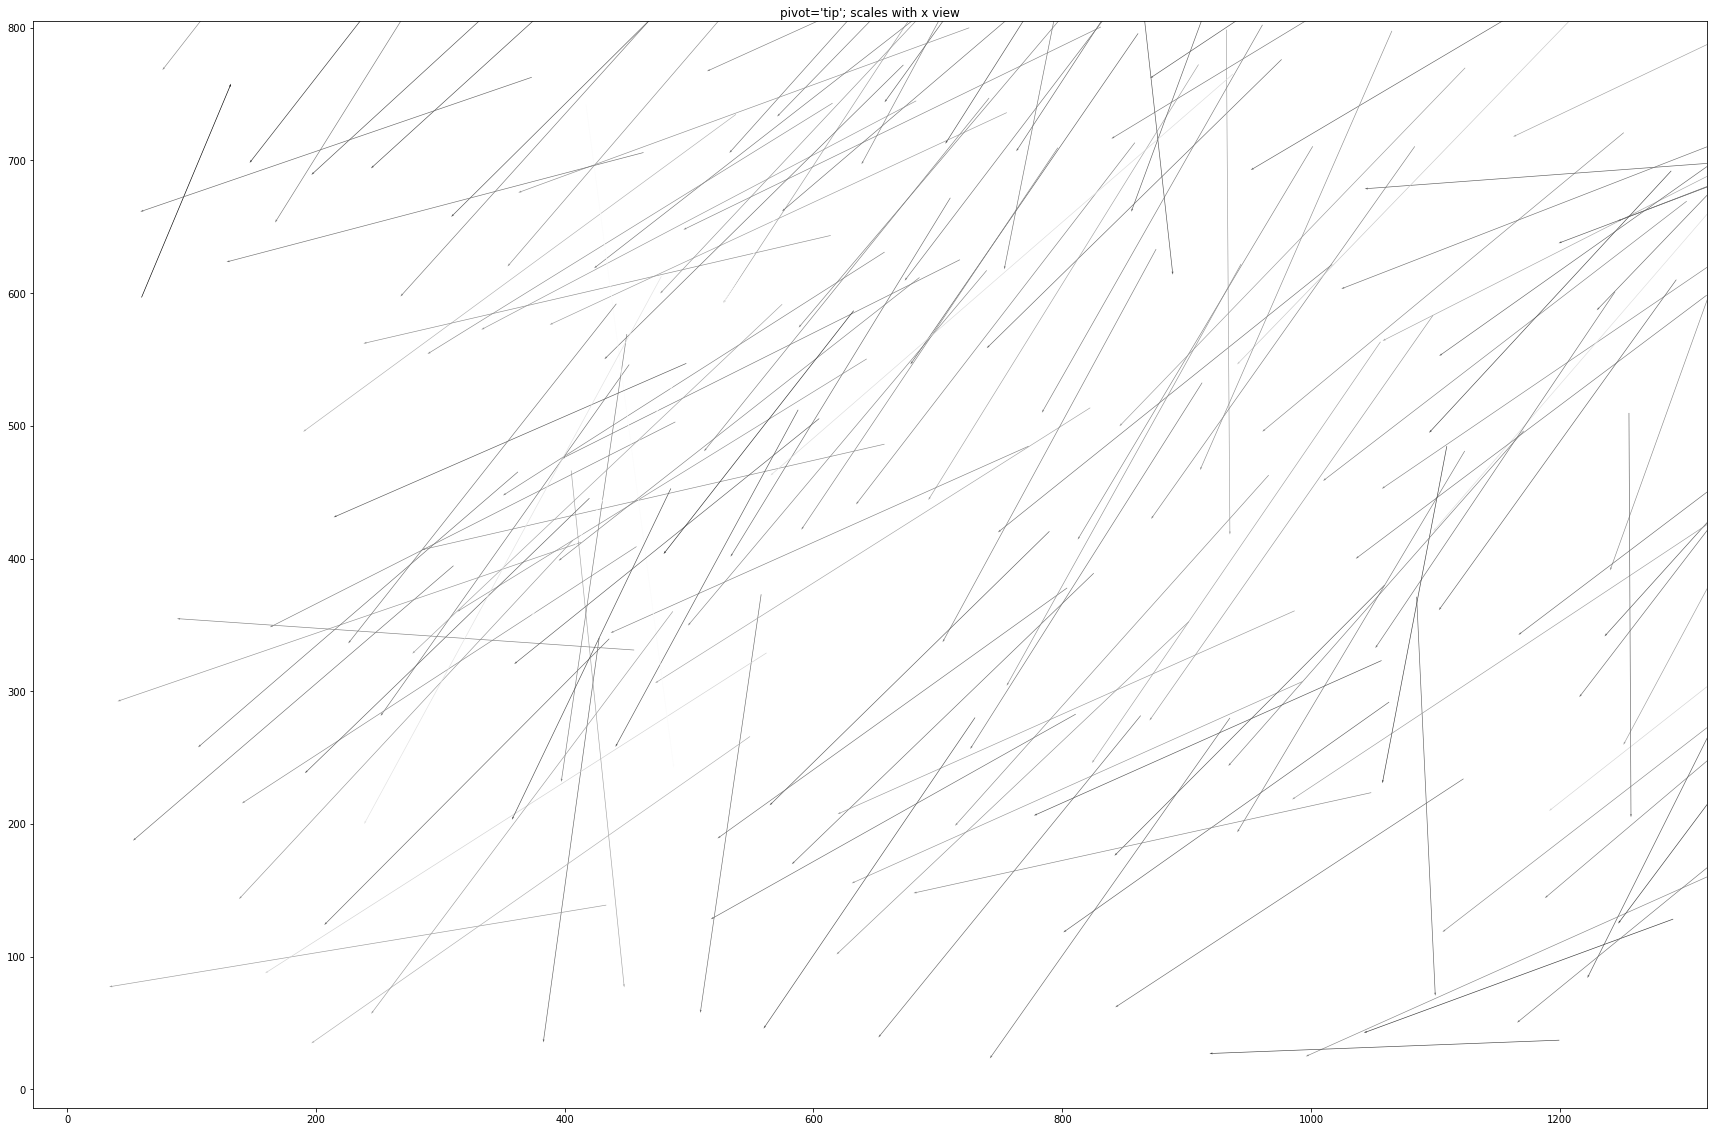

In [78]:
fig3, ax3 = plt.subplots()
ax3.set_title("pivot='tip'; scales with x view")
M = np.hypot(quvx, quvy)
Q = ax3.quiver(qupx,qupy,quvx,quvy, M, units='x', pivot='tip', width=0.5,scale=1 / 0.15,alpha=1)
qk = ax3.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',coordinates='figure')
#ax3.scatter(qupx,qupy, color='k', s=5)

plt.show()